<a href="https://colab.research.google.com/github/hmck8625/first/blob/master/min_pop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
"""
最大路

二次元リストからインデックスを取り出す
https://teratail.com/questions/118545
"""

import numpy as np
import scipy.sparse as ss
from scipy.sparse import csr_matrix
import pprint
import random
import matplotlib.pyplot as plt
#########################送受信ノードの決定###############################
def path_decide():
  nord = [0,1,2,3,4,5,6,7,8,9]
  num = random.sample(nord,2)
  start,end = num[0],num[1]
  return start,end
############################最短経路の取得############################
def get_path(start, goal, pred):
    return get_path_row(start, goal, pred[start])

def get_path_row(start, goal, pred_row):
    path = []
    i = goal
    while i != start and i >= 0:
        path.append(i)
        i = pred_row[i]
    if i < 0:
        return []
    path.append(i)
    return path[::-1]
############################初期値での最短経路の取得############################
def default_shotest_route(l):#(行、列)=(i,j)に最短格納されてる
  path_list = []
  d,p = ss.csgraph.dijkstra(l,return_predecessors=True,unweighted=True)
  for start in range(10):
    line_path_list = []
    for end in range(10):
      start = start #リストのインデックスに合わせてる
      end = end
      line_path_list.append(get_path(start,end,p))
    path_list.append(line_path_list)
  return path_list



l = [[0,3,0,3,0,0,0,0,0,0],
     [3,0,3,4,0,0,0,0,0,0],
     [0,3,0,0,4,3,0,0,0,0],
     [3,4,0,0,5,0,0,3,0,0],
     [0,0,4,5,0,5,0,4,0,0],
     [0,0,3,0,5,0,3,0,4,0],
     [0,0,0,0,0,3,0,0,3,0],
     [0,0,0,3,4,0,0,0,4,3],
     [0,0,0,0,0,4,3,4,0,3],
     [0,0,0,0,0,0,0,3,3,0]
    ]

rinsetu  = np.zeros((10,10))

l = np.array(l)
start,end = 2,5 #path_decide()

for i in range(5,0,-1):
  print("重み：",i)
  useable_link = np.argwhere(l == i)#今使える路を格納
  for i,j in useable_link:#risetuの利用可能リンクを１にして現在の隣接行列を生成
    rinsetu[i][j] = 1
  
  #現在の隣接行列で最短最大路があるか探索
  default_path_list = default_shotest_route(rinsetu)#現在の隣接行列での最短最大路があれば格納されている
  path = default_path_list[start][end]
  if path == []:#空リストつまり現在のリンクではつながらなかった時
    pass
  else:
    print(path)
    rinsetu  = np.zeros((10,10))
    break

重み： 5
重み： 4
[2, 4, 5]


In [17]:
"""
ダイクストラ法で最短経路の取得
https://note.nkmk.me/python-scipy-shortest-path/
"""

import numpy as np
import scipy.sparse as ss
from scipy.sparse import csr_matrix

def get_path(start, goal, pred):
    return get_path_row(start, goal, pred[start])

def get_path_row(start, goal, pred_row):
    path = []
    i = goal
    while i != start and i >= 0:
        path.append(i)
        i = pred_row[i]
    if i < 0:
        return []
    path.append(i)
    return path[::-1]

l_last = [[0,3,0,3,0,0,0,0,0,0],
     [3,0,3,4,0,0,0,0,0,0],
     [0,3,0,0,4,3,0,0,0,0],
     [3,4,0,0,5,0,0,3,0,0],
     [0,0,4,5,0,5,0,4,0,0],
     [0,0,3,0,5,0,3,0,4,0],
     [0,0,0,0,0,3,0,0,3,0],
     [0,0,0,3,4,0,0,0,4,3],
     [0,0,0,0,0,4,3,4,0,3],
     [0,0,0,0,0,0,0,3,3,0]
    ]


d,p = ss.csgraph.dijkstra(l,return_predecessors=True)
print(get_path(0,2,p))
print(get_path(0,2,p1))

[0, 3, 1, 2]
[0, 1, 2]


In [0]:

#return 
import random

#送受信ノードの決定

def path_decide():
  nord = [0,1,2,3,4,5,6,7,8,9]
  num = random.sample(nord,2)
  start,end = num[0],num[1]
  return start,end



(5, 8)


a
n= 0 N= 10000 呼損回数 0
呼損率: 0.0 %
a
n= 1 N= 10000 呼損回数 0
呼損率: 0.0 %
a
n= 2 N= 10000 呼損回数 0
呼損率: 0.0 %
a
n= 3 N= 10000 呼損回数 1571
呼損率: 15.709999999999999 %
a
n= 4 N= 10000 呼損回数 1803
呼損率: 18.029999999999998 %
a
n= 5 N= 10000 呼損回数 1979
呼損率: 19.79 %
a
n= 6 N= 10000 呼損回数 1910
呼損率: 19.1 %
a
n= 7 N= 10000 呼損回数 1941
呼損率: 19.41 %
a
n= 8 N= 10000 呼損回数 1799
呼損率: 17.990000000000002 %
a
n= 9 N= 10000 呼損回数 1797
呼損率: 17.97 %
a
n= 10 N= 10000 呼損回数 1865
呼損率: 18.65 %
a
n= 11 N= 10000 呼損回数 2065
呼損率: 20.65 %
a
n= 12 N= 10000 呼損回数 1926
呼損率: 19.259999999999998 %
a
n= 13 N= 10000 呼損回数 1876
呼損率: 18.759999999999998 %
a
n= 14 N= 10000 呼損回数 1962
呼損率: 19.62 %
a
n= 15 N= 10000 呼損回数 1867
呼損率: 18.67 %
a
n= 16 N= 10000 呼損回数 2032
呼損率: 20.32 %
a
n= 17 N= 10000 呼損回数 1704
呼損率: 17.04 %
a
n= 18 N= 10000 呼損回数 2117
呼損率: 21.17 %
a
n= 19 N= 10000 呼損回数 1909
呼損率: 19.09 %
a
n= 20 N= 10000 呼損回数 1904
呼損率: 19.040000000000003 %
a
n= 21 N= 10000 呼損回数 2049
呼損率: 20.49 %
a
n= 22 N= 10000 呼損回数 1973
呼損率: 19.73 %
a
n= 23 N= 10000 呼損回数 1968
呼

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_

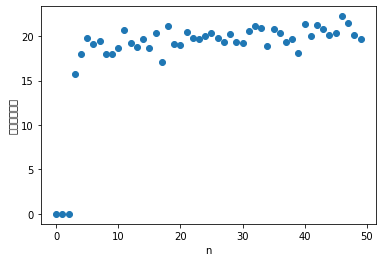

In [44]:
"""
通信の確立 固定経路
"""

import numpy as np
import scipy.sparse as ss
from scipy.sparse import csr_matrix
import pprint
import random
import matplotlib.pyplot as plt
#########################送受信ノードの決定###############################
def path_decide():
  nord = [0,1,2,3,4,5,6,7,8,9]
  num = random.sample(nord,2)
  start,end = num[0],num[1]
  return start,end
############################最短経路の取得############################
def get_path(start, goal, pred):
    return get_path_row(start, goal, pred[start])

def get_path_row(start, goal, pred_row):
    path = []
    i = goal
    while i != start and i >= 0:
        path.append(i)
        i = pred_row[i]
    if i < 0:
        return []
    path.append(i)
    return path[::-1]
############################初期値での最短経路の取得############################
def default_shotest_route(l):#(行、列)=(i,j)に最短格納されてる
  path_list = []
  d,p = ss.csgraph.dijkstra(l,return_predecessors=True,unweighted=True)
  for start in range(10):
    line_path_list = []
    for end in range(10):
      start = start #リストのインデックスに合わせてる
      end = end
      line_path_list.append(get_path(start,end,p))
    path_list.append(line_path_list)
  return path_list
############################つうしんの確立############################
def comm(path,l,path_list):
  global count
  l_copy = l
  for i in range(len(path)-1):#該当している辺の重みを－１する箇所
    pre_node,now_node = path[i],path[i+1] 
    if l_copy[pre_node][now_node] == 0: #空き容量のないリンクが現れた場合今回の変更をリセットして何も行わない
      #print(pre_node,now_node,"間の空き容量がありません。")
      path_list.append('FAIL')
      count += 1
      break
    else:#容量が開いていた場合、そのリンクの容量を1減らす
      l_copy[pre_node][now_node] -= 1
      l_copy[now_node][pre_node] -= 1
  l = l_copy #最後まで行けたらlを更新
  path_list.append(path)
  return l

 ############################通信の切断############################
def suspend(path_list,l):
  path = path_list[0]
  l_copy = l
  if path == 'FAIL':#n回前の通信が失敗してた時
    del path_list[0]
    return 0
  else:
    for i in range(len(path)-1):#該当している辺の重みを+１する箇所
      pre_node,now_node = path[i],path[i+1] 
      l_copy[pre_node][now_node] += 1 
      l_copy[now_node][pre_node] += 1
  l = l_copy #最後まで行けたらlを更新
  del path_list[0]
  return 0

def main(n):
   #n回前の通信を終了
  l = [[0,3,0,3,0,0,0,0,0,0],
      [3,0,3,4,0,0,0,0,0,0],
      [0,3,0,0,4,3,0,0,0,0],
      [3,4,0,0,5,0,0,3,0,0],
      [0,0,4,5,0,5,0,4,0,0],
      [0,0,3,0,5,0,3,0,4,0],
      [0,0,0,0,0,3,0,0,3,0],
      [0,0,0,3,4,0,0,0,4,3],
      [0,0,0,0,0,4,3,4,0,3],
      [0,0,0,0,0,0,0,3,3,0]
      ]
  path_list = []
  default_path_list = default_shotest_route(l)#(行、列)=(i,j)に最短格納されてる

  N = 10000 #通信の回数

  flag = False

  for i in range(N):
    start,end = path_decide()
    path = default_path_list[start][end]
    comm(path,l,path_list)
    if len(path_list) > n:
      flag = True
    if flag == True:
      suspend(path_list,l)
  kosonnritu = (count/N)*100
  
  print("n=",n,"N=",N,"呼損回数",count)
  print("呼損率:",kosonnritu,"%")
  return kosonnritu




count = 0
koson = [] #呼損率を入れる
n = 50
for i in range (n):
  print("a")
  koson.append(main(i))
  count = 0 #関数内でcountはグローバル変数で使ってしまったからここで0に更新しないと別のnになってるのにcountが繰り越されることになる。
x = range(0,n,1)
plt.scatter(x,koson)
plt.xlabel("n")
plt.ylabel("呼損率（％）")
plt.show()



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_

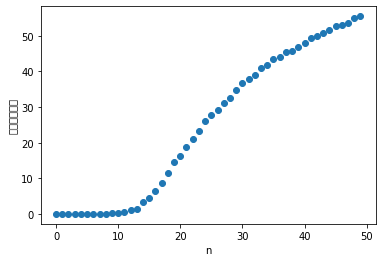

In [45]:
"""
通信の確立 要求時経路
"""
import numpy as np
import scipy.sparse as ss
from scipy.sparse import csr_matrix
import pprint
import random
import matplotlib.pyplot as plt

#########################送受信ノードの決定###############################
def path_decide():
  nord = [0,1,2,3,4,5,6,7,8,9]
  num = random.sample(nord,2)
  start,end = num[0],num[1]
  return start,end
############################最短経路の取得############################
def get_path(start, goal, pred):
    return get_path_row(start, goal, pred[start])

def get_path_row(start, goal, pred_row):
    path = []
    i = goal
    while i != start and i >= 0:
        path.append(i)
        i = pred_row[i]
    if i < 0:
        return []
    path.append(i)
    return path[::-1]
############################通信の確立############################
def comm(start,end,l,path_list):
  global count
  d,p = ss.csgraph.dijkstra(l,return_predecessors=True,unweighted=True) #経路選択
  path = get_path(start,end,p)
  l_copy = l
  if path == []:#経路がない場合
    #print("経路上に空きのないリンクがあります。")  
    path_list.append('FAIL')
    count = count + 1
    return 0
  else:
    for i in range(len(path)-1):#該当している辺の重みを－１する箇所
      pre_node,now_node = path[i],path[i+1] 
#容量が開いていた場合、そのリンクの容量を1減らす
      l_copy[pre_node][now_node] -= 1
      l_copy[now_node][pre_node] -= 1
    l = l_copy #最後まで行けたらlを更新
    path_list.append(path)
    #print("success")
    return 0
 ############################通信の切断############################
def suspend(path_list,l):
  l_copy = l
  path = path_list[0]
  if path == 'FAIL':#n回前の通信が失敗してた時
    del path_list[0]
    return 0
  else:
    for i in range(len(path)-1):#該当している辺の重みを+１する箇所
      pre_node,now_node = path[i],path[i+1] 
      l_copy[pre_node][now_node] += 1 
      l_copy[now_node][pre_node] += 1
  l = l_copy #最後まで行けたらlを更新
  del path_list[0]
  return 0

def main(n):
   #n回前の通信を終了
  l = [[0,3,0,3,0,0,0,0,0,0],
      [3,0,3,4,0,0,0,0,0,0],
      [0,3,0,0,4,3,0,0,0,0],
      [3,4,0,0,5,0,0,3,0,0],
      [0,0,4,5,0,5,0,4,0,0],
      [0,0,3,0,5,0,3,0,4,0],
      [0,0,0,0,0,3,0,0,3,0],
      [0,0,0,3,4,0,0,0,4,3],
      [0,0,0,0,0,4,3,4,0,3],
      [0,0,0,0,0,0,0,3,3,0]
      ]
  path_list = []

  N = 10000 #通信の回数

  flag = False

  for i in range(N):
    start,end = path_decide()
    comm(start,end,l,path_list)

    if len(path_list) > n:
      flag = True
    if flag == True:
      suspend(path_list,l)
  kosonnritu = (count/N)*100
  return kosonnritu
  """  
  print("n=",n,"N=",N,"呼損回数",count)
  print("呼損率:",kosonnritu,"%")
  """

count = 0
koson = [] #呼損率を入れる
n = 50
for i in range (n):
  koson.append(main(i))
  count = 0 #関数内でcountはグローバル変数で使ってしまったからここで0に更新しないと別のnになってるのにcountが繰り越されることになる。
x = range(0,n,1)
plt.scatter(x,koson)
plt.xlabel("n")
plt.ylabel("呼損率（％）")
plt.show()

In [0]:
"""
通信の切断
"""
import pprint
def comm(start,end,l):
  start,end = 0,9
  d,p = ss.csgraph.dijkstra(l,return_predecessors=True)
  path = get_path(start,end,p)
  print(path)
  l_copy = l
  for i in range(len(path)-1):#該当している辺の重みを－１する箇所
    pre_node,now_node = path[i],path[i+1] 
    if l_copy[pre_node][now_node] == 0: #空き容量のないリンクが現れた場合今回の変更をリセットして何も行わない
      print(pre_node,now_node,"間の空き容量がありません。")
      break
    else:#容量が開いていた場合、そのリンクの容量を1減らす
      l_copy[pre_node][now_node] += 1
      l_copy[now_node][pre_node] += 1
  l = l_copy #最後まで行けたらlを更新
  pprint.pprint(l)